# Scenarios

The scenarios are taken from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections.

Modifications:
-   we set the STAUMIX values to maximally mixed for sleptons
-   we manually set the massses of all particles tagged with an @a or {M...} 

In [2]:
#%load_ext nb_black
import hepi


print(hepi.__version__)
import smpl
from smpl import data
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino/build")
print(rs.get_path())
print(rs.get_version())

test_lo = False
analyse  = True # else generation

plt.rcParams.update({'font.size': 15})
plt.rc('legend', fontsize=12)
#rm tex files
from smpl import io
import os
for _,_,f in io.files(".tex"):
    os.remove(f)

0.1.13.13+dirty
~/git/resummino/build


In [12]:
params = [
    "sleptons.slha",
]
pss = [
    (+1000011, -1000011),  # l_L^+ l_L^-
    #(+2000011, -2000011),  # l_R^+ l_R^-
    #(+1000015, -1000015),  # l_1^+ l_1^-
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        name = str(energy) + "_sleptons_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir("output_" + name +"/")
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000011,
                    2000011,
                    1000012,
                    1000013,
                    2000013,
                    1000014,
                    1000015,
                    2000015,
                    1000016,
                ],
                range(100, 1010, 100),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,1)
                    axs[1].set_ylim(0.25,1.75)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{l}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000011")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000011,show=True,interpolator='exp')

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 470 jobs


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


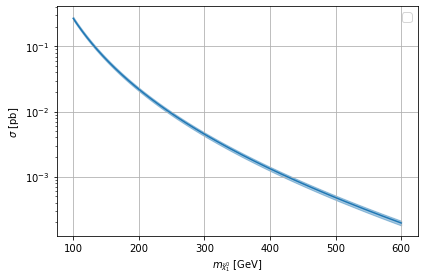

In [11]:
import urllib.request
dl = hepi.load(urllib.request.urlopen(

"https://raw.githubusercontent.com/fuenfundachtzig/xsec/master/json/pp13_slep_L_NLO%2BNLL.json"

))

hepi.plot(dl,"slL","NLO_PLUS_NLL",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",fill=True,plot_data=False,interpolate=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp)

# aNNLO+NNLL sleptons

......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:04<00:00, 94.16it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.050816272286855944% vs scale:0.44484381808922474% to -0.24683546956978486%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.049781726510892334% vs scale:0.4288128209552172% to -0.20802802391455022%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04679647514336354% vs scale:0.4163294313566896% to -0.1784023613365681%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNL

$m_{\tilde{e}_{L}^{-}}$ [GeV]


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:04<00:00, 102.17it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05112152981287044% vs scale:0.4495337628530927% to -0.25512930896752345%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.049726497497620384% vs scale:0.4347009667728526% to -0.2176600581168557%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04931420896881146% vs scale:0.40471706473742974% to -0.19308214066825227%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL

$m_{\tilde{e}_{L}^{-}}$ [GeV]


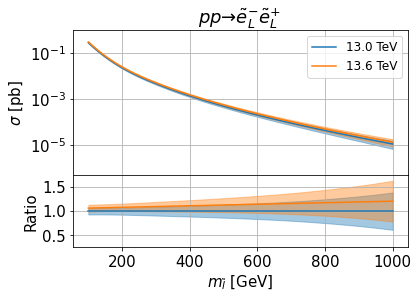

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:03<00:00, 140.35it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.051451651157598415% vs scale:0.4395735675074294% to -0.2496593026024474%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05014199864390707% vs scale:0.424761135934013% to -0.2179270983459224%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04717659238524475% vs scale:0.4114233829499072% to -0.1799680558954575%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.0

$m_{\tilde{e}_{L}^{-}}$ [GeV]
..

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:02<00:00, 173.36it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05182779136367944% vs scale:0.4495343759252959% to -0.25727118437420804%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05037204056549719% vs scale:0.40941187460321143% to -0.22961724184094615%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.049400432977859295% vs scale:0.4143174096298671% to -0.19146976239901115%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNL

$m_{\tilde{e}_{L}^{-}}$ [GeV]


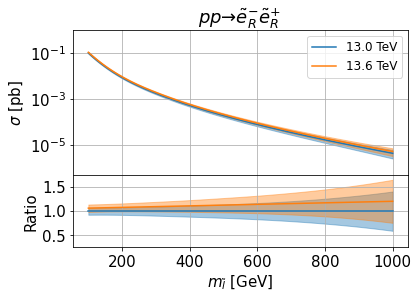

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:02<00:00, 181.25it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05147505332082085% vs scale:0.4396484928991293% to -0.24973505108989133%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05016584181355182% vs scale:0.41624920957064654% to -0.21782550495962516%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04722169208160772% vs scale:0.4100990155005677% to -0.18004407949897044%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL

$m_{\tilde{e}_{L}^{-}}$ [GeV]


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 470 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 470/470 [00:03<00:00, 156.26it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.05176029545315122% vs scale:0.45246250476558914% to -0.25713464186692364%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.0504625818828719% vs scale:0.4096266004751944% to -0.2298117176077102%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04941845889131556% vs scale:0.4146605702840464% to -0.19135817112617287%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0

$m_{\tilde{e}_{L}^{-}}$ [GeV]


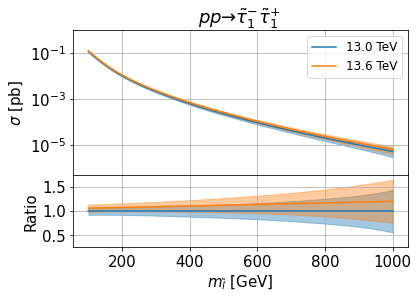

In [6]:
params = [
    "sleptons.slha",
]
pss = [
    (+1000011, -1000011),  # l_L^+ l_L^-
    (+2000011, -2000011),  # l_R^+ l_R^-
    (+1000015, -1000015),  # l_1^+ l_1^-
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        name = str(energy) + "_sleptons_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir("output_" + name +"/")
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000011,
                    2000011,
                    1000012,
                    1000013,
                    2000013,
                    1000014,
                    1000015,
                    2000015,
                    1000016,
                ],
                range(100, 1010, 100),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,1)
                    axs[1].set_ylim(0.25,1.75)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{l}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000011")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000011,show=True,interpolator='exp')

# aNNLO+NNLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:08<00:00, 109.64it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04045435475783379% vs scale:0.40541037224950827% to -0.18847517775507%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04230219169884242% vs scale:0.3571007674122106% to -0.19407321069839029%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04180527233142186% vs scale:0.3368956659138532% to -0.17152811497472129%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:05<00:00, 175.56it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04309664509704866% vs scale:0.2120437718733099% to -0.6469057675028789%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.042504779518476164% vs scale:0.3680169775711219% to -0.19312803752200894%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04241434348898593% vs scale:0.35194078791296% to -0.17283168618762182%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.0391012861071

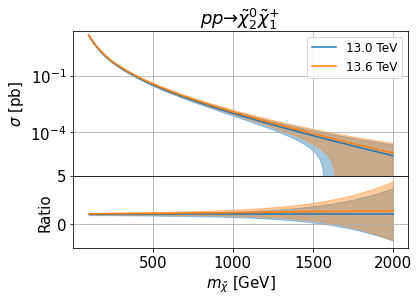

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:09<00:00, 104.09it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04134919369924972% vs scale:0.2863499316017135% to -0.180590470929161%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04362717909632595% vs scale:0.26139926787058876% to -0.14218526430809397%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.043057843638519014% vs scale:0.2660054788139857% to -0.12732570955876013%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:13<00:00, 67.39it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04019589582312767% vs scale:0.19060031369651903% to -0.6646996844352451%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03890398681110522% vs scale:0.2638187738855267% to -0.1722466747660393%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04378058105893512% vs scale:0.2492803266843277% to -0.1305525929371378%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.0442265459848

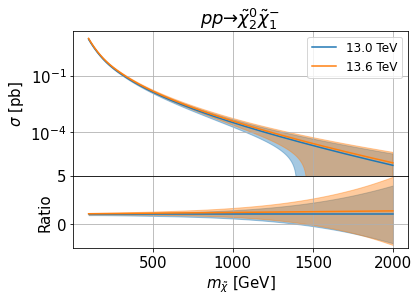

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:16<00:00, 58.68it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04158041783058077% vs scale:0.34935582628844475% to -0.20344146580165332%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.040357461591111074% vs scale:0.35141254086713164% to -0.16827730006482142%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03952253667702437% vs scale:0.30887901101090237% to -0.1560087686652

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 940 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 940/940 [00:08<00:00, 110.78it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04200231668635053% vs scale:0.10601719446194516% to -0.5614510769642985%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04081819266183245% vs scale:0.3528031721292706% to -0.18267706047241655%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03948894972762649% vs scale:0.30723993250114257% to -0.1617394921082837%
  warnings.

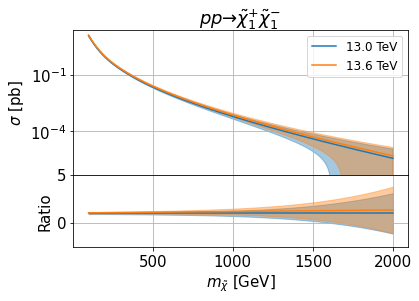

In [7]:
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    ( 1000023, -1000024),  # N1C1m
    (+1000024, -1000024),  # C1pC1m
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        name = str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
               "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    range(100,2010,100),
                )
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,25)
                    axs[1].set_ylim(-2.5,5.0)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)

# aNNLO+NNLL hino degenerate


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:04<00:00, 151.37it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04052058093401847% vs scale:0.4097903339433036% to -0.18842603755074597%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04233209057308011% vs scale:0.3587436454031549% to -0.1926877078257514%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04179990864282743% vs scale:0.33784613152698045% to -0.17162310796458255

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:07<00:00, 100.52it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04309586142182388% vs scale:0.21211415293660466% to -0.6469647981304008%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04249945438983312% vs scale:0.35759416795602855% to -0.19348151771231792%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04241054651423053% vs scale:0.3525308433689359% to -0.1731952845806218%
  warnings.

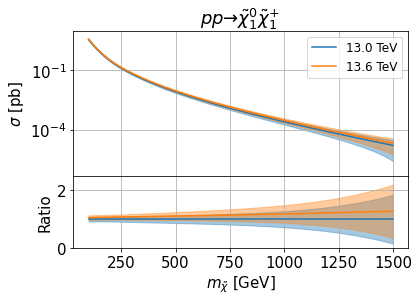

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:08<00:00, 86.04it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04196398498021944% vs scale:0.28018577839075914% to -0.18582119220137508%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.043628585537359606% vs scale:0.2617430930215996% to -0.14125690745596609%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04306003126528784% vs scale:0.2667783768721834% to -0.127053615985485

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:04<00:00, 147.19it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040195288974951275% vs scale:0.19065131395656834% to -0.6647468394568475%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.039596433217332305% vs scale:0.2819570633861206% to -0.19768558979625356%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.038897704654011246% vs scale:0.26414747302304376% to -0.17182389092386458%
  warni

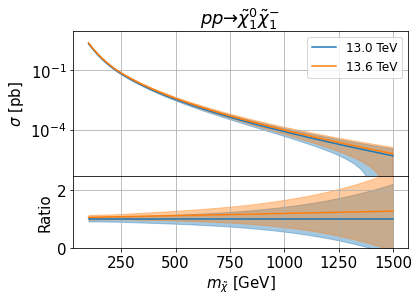

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:07<00:00, 100.20it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.037885442735923376% vs scale:0.32324268652927696% to -0.17520031029641883%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03951770365330619% vs scale:0.2972042868903759% to -0.16373957552503088%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03974288873793001% vs scale:0.29315980119664203% to -0.15030187777536

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:07<00:00, 94.47it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.0426199942217945% vs scale:0.10115642284863897% to -0.5561417726515643%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04125684204766504% vs scale:0.32372484512546107% to -0.1908830874301%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03758815244338971% vs scale:0.3242693102258228% to -0.15981475545038307%
  warnings.warn

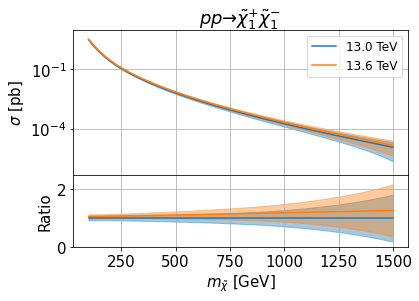

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:08<00:00, 85.08it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04138468887432918% vs scale:0.3575946435122614% to -0.20092718139825272%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04005425821584113% vs scale:0.35668278241502577% to -0.1685320560537849%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03937018762713386% vs scale:0.3088559914994737% to -0.1579776728394997%

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 705 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:06<00:00, 110.51it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.041661719660808165% vs scale:0.10732499422582724% to -0.5632317398429377%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.040512606938662044% vs scale:0.35478647910668837% to -0.18265189944216928%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.041773404416157484% vs scale:0.33382861276381615% to -0.16085211714866576%
  warn

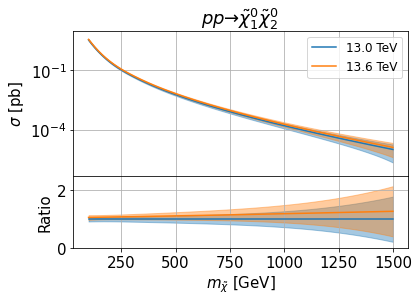

In [8]:
params = [
    "hino.slha",
]
pss = [
    (1000022, +1000024),  # N2C1p
    (1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC2m
    (1000022, 1000023),  # N2N1
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        # save to different folders to have some substructure
        name = str(energy) + "_hino_deg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(100, 1510, 100),
                negate=[1000022],
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,plot_data=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,10)
                    axs[1].set_ylim(0,2.5)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000023")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000023,show=True,interpolator='exp')

# aNNLO+NNLL hino non-degenerate

/home/apn/.local/lib/python3.9/site-packages/hepi/util.py:160: UserWarning: PDF set 'CTEQ6.6 and MSTW2008nlo90cl' not installed!
  warnings.warn("PDF set '" + name + "' not installed!")
/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:45<00:00, 74.87it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04343047825483943% vs scale:0.0% to -0.3512390295187086%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04354705680873473% vs scale:0.0% to -0.5413707974185775%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04339387732406151% vs scale:0.0% to -0.2921307337924854%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: Ru

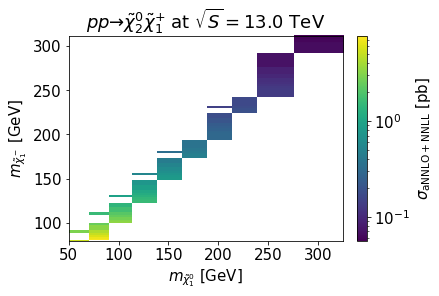

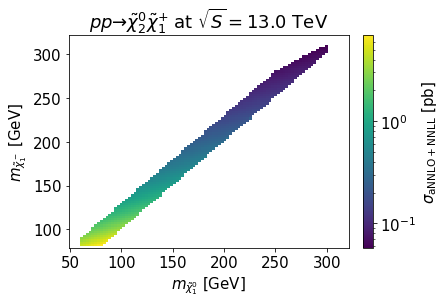

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:53<00:00, 64.21it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04362634268078727% vs scale:0.06886075103123562% to -0.6224722772201845%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04358778681464052% vs scale:0.017969238148330836% to -0.5634203298395374%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04349567264534439% vs scale:0.0% to -0.4183744957264197%
  warnings.warn(
/home/apn/.local/lib/python3.9/site

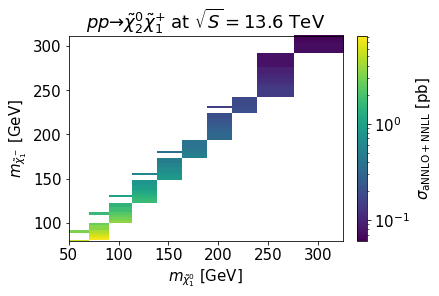

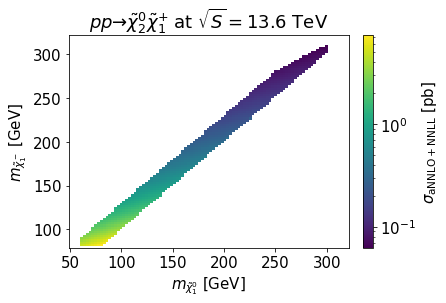

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:47<00:00, 72.12it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04045396559943009% vs scale:0.0% to -0.39351254026325155%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04054282286371142% vs scale:0.0% to -0.5901963685063619%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040425799280157285% vs scale:0.0% to -0.3324132394881944%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040586399946096426% vs scale:0.08637391667177097% to -0.6935786425522174%
  warnings.warn(
/home

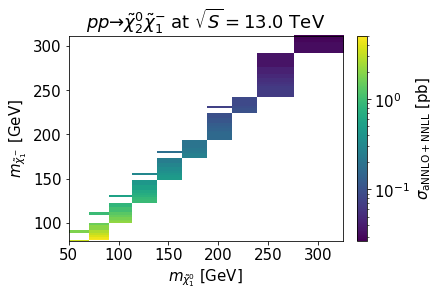

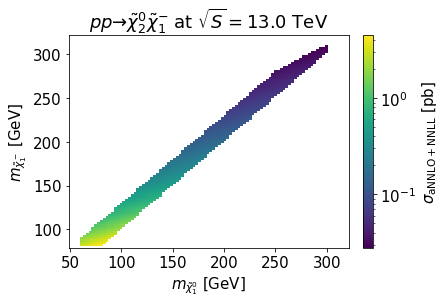

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:25<00:00, 133.46it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04059890202708404% vs scale:0.07490858241825685% to -0.6723672850277665%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040570756160462094% vs scale:0.02229820710396929% to -0.6112782859789286%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040501620426267426% vs scale:0.0% to -0.46128840480860206%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040544852071684734% vs scale:0.0% to -0.559110470911655%
  warn

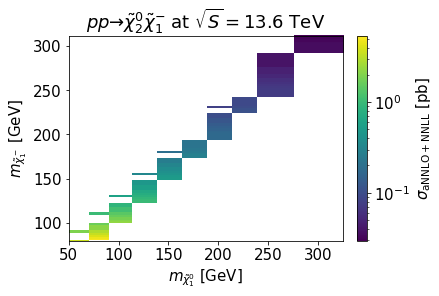

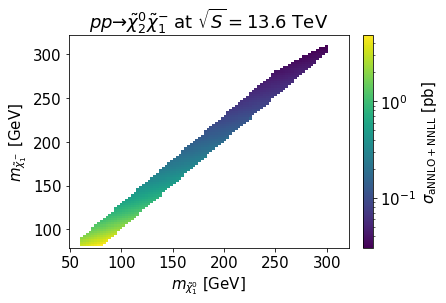

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:58<00:00, 58.60it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04291576683640941% vs scale:0.0% to -0.49112809188747153%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.042894842558562817% vs scale:0.0% to -0.4510811401578142%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04284302224458829% vs scale:0.0% to -0.3521758794330467%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:238: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04306420509561114% vs scale:0.17834545671794505% to -0.7584661584743067%
  warnings.warn(
/home/

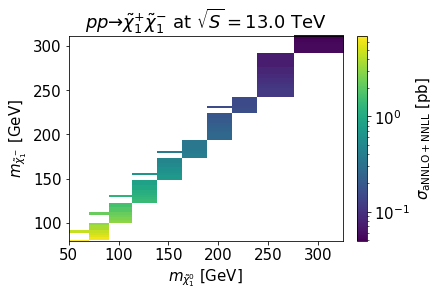

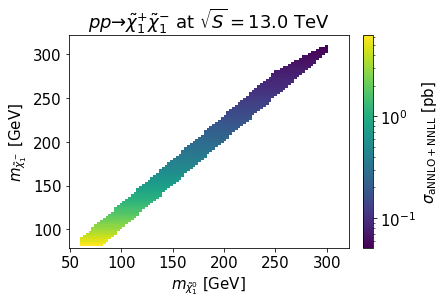

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3431/3431 [00:49<00:00, 69.41it/s]


KeyboardInterrupt: 

In [10]:
params = [
    "higgsino_slha_C1C1.slha",
]
pss = [
    ( 1000023, +1000024),  # N2C1p
    ( 1000023, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC1m
    ( 1000022,  1000023),  # N2N1
]
import urllib

dl = hepi.load(
    urllib.request.urlopen(
        "https://raw.githubusercontent.com/APN-Pucky/xsec/master/json/pp13_hinosplit_N2N1_NLO%2BNLL.json"
    ),
    dimensions=2,
)
N1 = dl["N1"]
N2 = dl["N2"]
NX = dl["N1"] / 2 + dl["N2"] / 2
for pa, pb in pss:
    for energy in [13000, 13600]:
        # save to different folders to have some substructure
        name= str(energy) + "_hino_nondeg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.slha_scan_rel(
                li,
                lambda r: [
                    ["MASS", 1000022, N1[r]],
                    ["MASS", 1000023, -N2[r]],
                    ["MASS", 1000024, NX[r]],
                ],
                range(len(N1)),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=True, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    
                    
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()
                    #"""
                    hepi.mapplot(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]")

                    hepi.title(li[0],pdf_info=False,scenario="")

                    xx,yy = data.flatmesh(np.linspace(50,320,100),np.linspace(80,320,100))
                    dll = hepi.interpolate_2d(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xx,yy,interpolator="linearnd",pre=np.log,post=np.exp)             
                    hepi.mapplot(dll,"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]",fill_missing=False)
                    
                    hepi.title(li[0],pdf_info=False,scenario="")
                    plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                    plt.show()
                    #"""
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000022")
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000023")
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000024")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
                
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"MASS_1000022","MASS_1000024","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 629.09it/s]


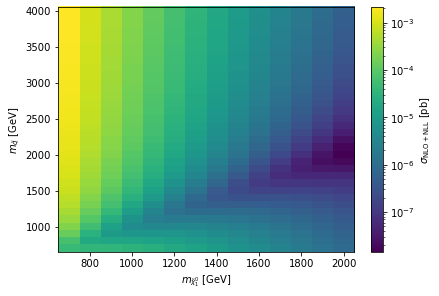

/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

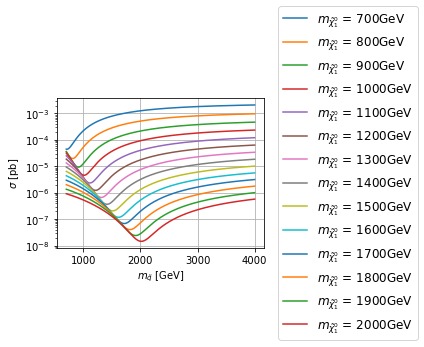

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 950.97it/s]


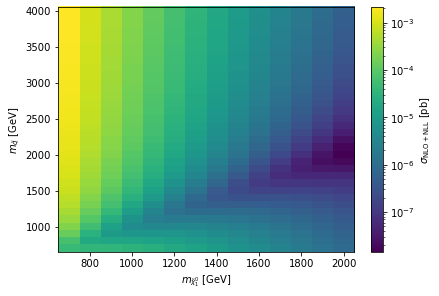

/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

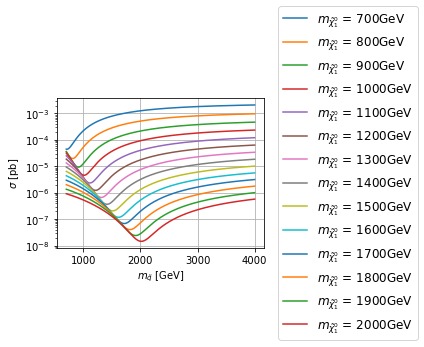

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 983.00it/s]


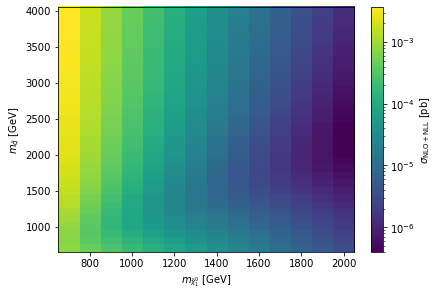

/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))
/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

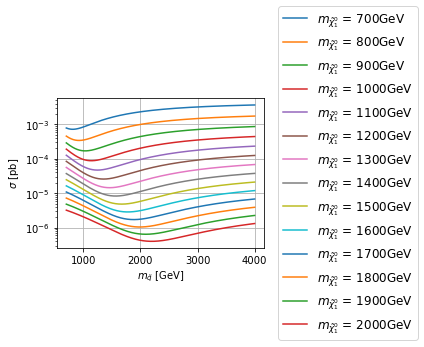

In [13]:
test_lo=True
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    ( 1000023, -1000024),  # N1C1m
    (+1000024, -1000024),  # C1pC1m
]
m_xs=range(700,2010,100)
for pa, pb in pss:
    for energy in [13600]:
        name = str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                   li,
                    [
                        1000022,
                        1000023,
                        1000024,
                     ],
                     m_xs,
                 )
            li = hepi.masses_scan(
                     li,
                    [
                       1000001,
                       1000002,
                       1000003,
                       1000004,
                       2000001,
                       2000002,
                       2000003,
                       2000004,
                   ],
                   range(700,4010,100), # decoupling else 1e5
               )
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,25)
                    axs[1].set_ylim(-2.5,5.0)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000022_1000023_1000024","mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{q}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                for m_x in m_xs:
                    hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==m_x],"LO",1000002,data_fmt=".",lpos=6,bbox_to_anchor=(1.04,0.5),interpolate_label="$m_{\\tilde{\\chi}_1^0}$ = " + str(m_x) + "GeV",xaxis="$m_{\\tilde{q}}$ [GeV]",cont=True,plot_data=False,interpolate=True)
                plt.show()

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 925.84it/s]


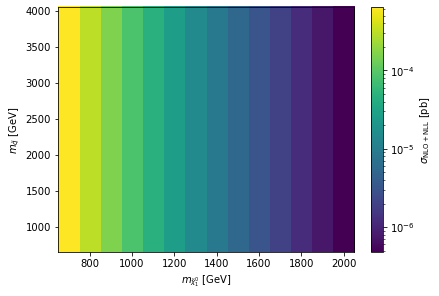

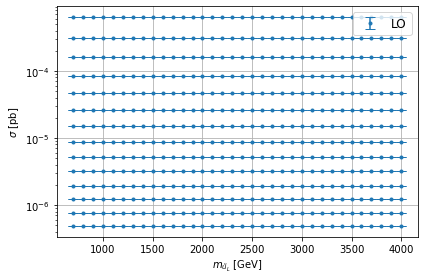

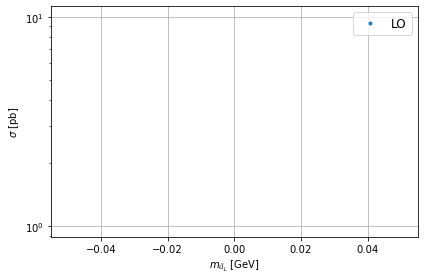

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 924.96it/s]


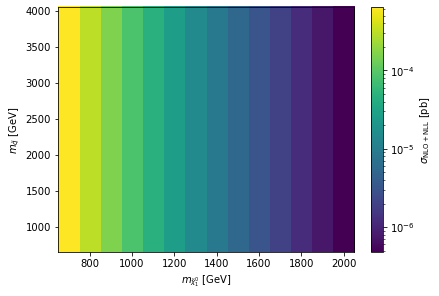

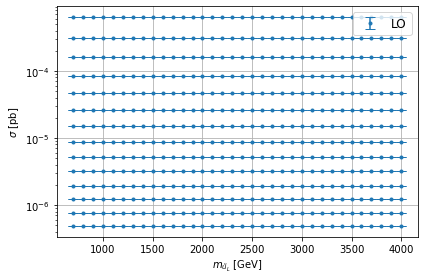

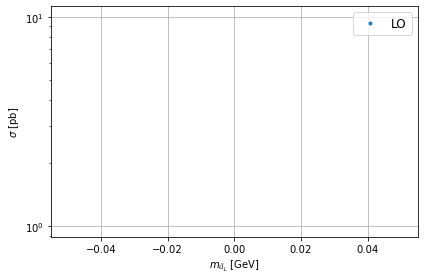

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 933.64it/s]


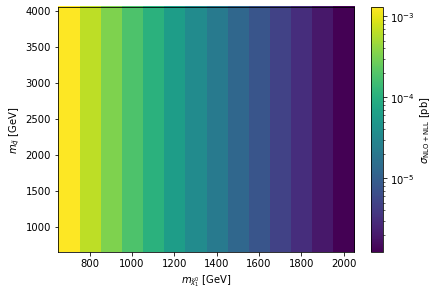

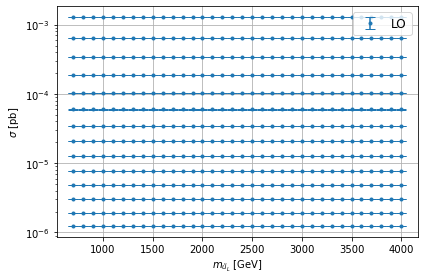

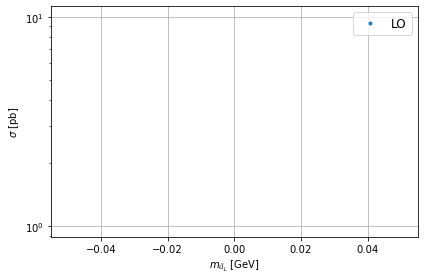

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 476 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:00<00:00, 898.85it/s]


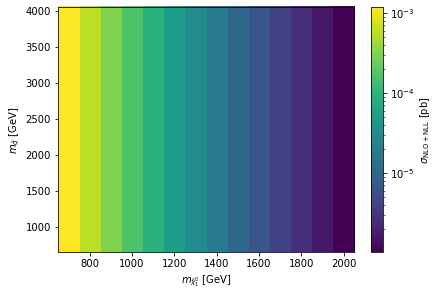

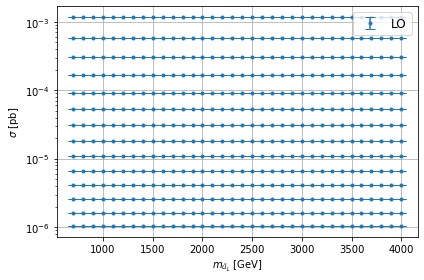

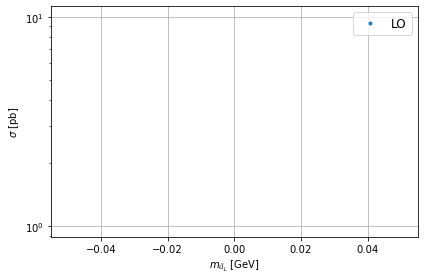

In [15]:
test_lo=True
params = [
    "hino.slha",
]
pss = [
    (1000022, +1000024),  # N2C1p
    (1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC2m
    (1000022, 1000023),  # N2N1
]
for pa, pb in pss:
    for energy in [13600]:
        # save to different folders to have some substructure
        name = str(energy) + "_hino_deg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(700, 2010, 100),
                negate=[1000022],
            )
            li = hepi.masses_scan(
                     li,
                    [
                       1000001,
                       1000002,
                       1000003,
                       1000004,
                       2000001,
                       2000002,
                       2000003,
                       2000004,
                   ],
                   range(700,4100,100), # decoupling else 1e5
            )
            
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,plot_data=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,10)
                    axs[1].set_ylim(0,2.5)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000023")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000022_1000023_1000024","mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{q}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                hepi.mass_plot(rs_dl,"LO",1000002,data_fmt=".",show=True,interpolate=False)
                hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==100],"LO",1000002,data_fmt=".",show=True,interpolate=False)
                

...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||...........||||||||||= 420 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:00<00:00, 882.81it/s]


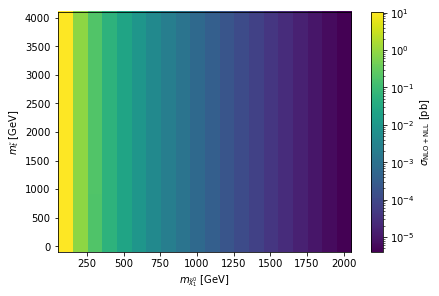

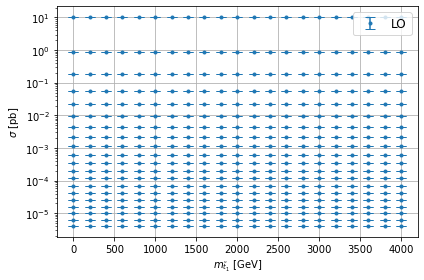

In [45]:
test_lo=True
params = [
    "wino_ch.slha",
]
pss = [
    (+1000024, -1000024),  # C1pC1m
]
for pa, pb in pss:
    for energy in [13600]:
        name = str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
               "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    range(100,2010,100),
                )
            li = hepi.masses_scan(
                    li,
                    [
                        1000006,
                        2000006,
                    ],
                    range(0,4010,100),
                )
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,25)
                    axs[1].set_ylim(-2.5,5.0)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000022_1000023_1000024","mass_1000006_2000006","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{t}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                hepi.mass_plot(rs_dl,"LO",1000006,data_fmt=".",show=True,interpolate=False)

/home/apn/.local/lib/python3.9/site-packages/hepi/plot.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_list["mass_" + str(part)] = get_mass(dict_list, abs(part))


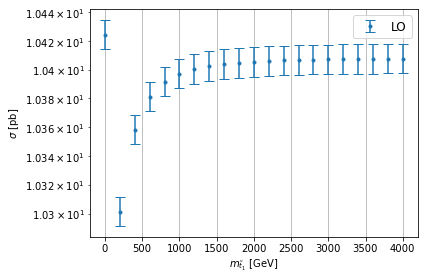

In [46]:
hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==100],"LO",1000006,data_fmt=".",show=True,interpolate=False)